# Exploratory Data Analysis
We beginnen met de setup en het corrigeren van de datetime datatype


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast # Voor het omzetten van strings naar lijsten

vkm = pd.read_csv('../Opgeschoonde_VKM_dataset.csv')

vkm['start_date'] = pd.to_datetime(vkm['start_date'])


def parse_tags(x):
    try:
        return ast.literal_eval(x)
    except (ValueError, SyntaxError):
        return []
        
vkm['module_tags_list'] = vkm['module_tags'].apply(parse_tags)

vkm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     211 non-null    int64         
 1   name                   211 non-null    object        
 2   shortdescription       211 non-null    object        
 3   description            211 non-null    object        
 4   studycredit            211 non-null    int64         
 5   location               211 non-null    object        
 6   contact_id             211 non-null    int64         
 7   level                  211 non-null    object        
 8   learningoutcomes       211 non-null    object        
 9   module_tags            211 non-null    object        
 10  interests_match_score  211 non-null    float64       
 11  popularity_score       211 non-null    int64         
 12  estimated_difficulty   211 non-null    int64         
 13  avail

In [2]:

vkm.head()


,id,name,shortdescription,description,studycredit,location,contact_id,level,learningoutcomes,module_tags,interests_match_score,popularity_score,estimated_difficulty,available_spots,start_date,module_tags_list
0,159,kennismaking met psychologie,"brein, gedragsbeinvloeding, ontwikkelingspsych...",in deze module leer je hoe je gedrag van jezel...,15,den bosch,58,nlqf5,a. je beantwoordt vragen in een meerkeuze kenn...,"['brein', 'gedragsbeinvloeding', 'ontwikkeling...",0.54,319,1,79,2025-12-24,"[brein, gedragsbeinvloeding, ontwikkelingspsyc..."
1,160,learning and working abroad,"internationaal, persoonlijke ontwikkeling, ver...",studenten kiezen binnen de (stam) van de oplei...,15,den bosch,58,nlqf5,de student toont professioneel gedrag conform ...,"['internationaal', 'persoonlijke', 'ontwikkeli...",0.92,172,5,56,2025-12-20,"[internationaal, persoonlijke, ontwikkeling, v..."
2,161,proactieve zorgplanning,"proactieve zorgplanning, cocreatie, ziekenhuis",het jeroen bosch ziekenhuis wil graag samen me...,15,den bosch,59,nlqf5,de student past pro actieve zorgplanning toe b...,"['proactieve', 'zorgplanning', 'cocreatie', 'z...",0.78,217,5,55,2025-09-23,"[proactieve, zorgplanning, cocreatie, ziekenhuis]"
3,162,rouw en verlies,"rouw & verlies, palliatieve zorg & redeneren, ...",in deze module wordt stil gestaan bij rouw en ...,30,den bosch,58,nlqf6,de student regisseert en voert (deels) zelfsta...,"['rouw', 'verlies', 'palliatieve', 'zorg', 're...",0.69,454,1,54,2025-10-25,"[rouw, verlies, palliatieve, zorg, redeneren, ..."
4,163,acuut complexe zorg,"acute zorg, complexiteit, ziekenhuis, revalidatie",in deze module kunnen studenten zich verdiepen...,30,den bosch,58,nlqf6,de student regisseert en voert (deels) zelfsta...,"['acute', 'zorg', 'complexiteit', 'ziekenhuis'...",0.40,178,5,38,2025-11-19,"[acute, zorg, complexiteit, ziekenhuis, revali..."


# Univariate Analyses
We kijken naar de verdelingen van popularity_score, available_spots, en estimated_difficulty.

Ook kijken we hoeveel modules er per Location, of level er zijn. 

In [3]:
vkm[['popularity_score', 'available_spots', 'estimated_difficulty']].describe()

,popularity_score,available_spots,estimated_difficulty
count,211.000000,211.000000,211.000000
mean,254.265403,49.677725,3.156398
std,141.703600,17.960815,1.486189
min,10.000000,20.000000,1.000000
25%,135.500000,34.000000,2.000000
50%,265.000000,49.000000,3.000000
75%,374.000000,67.000000,5.000000
max,500.000000,80.000000,5.000000


Hier worden al een paar dingen duidelijk.

De gemmiddelde keuzemodule heeft een populariteits score van 254 op de 500.
Er is een of meerdere modules met een populariteits score van 10 op de 500.

De gemiddelde keuzemodule heeft ongeveer 50 plekken:  49.68 'available spots'.
Er zijn keuzemodules met weinig plek, het minste is:  20 'available spots'. 
Sommige keuzemodules hebben veel plek, het meeste is: 80 'available spots'.

De gemiddelde geschatte moeilijkheid is: 3.16 op de 5 'estimated difficulty'.
Het minimale en het maximale 1 en 5. 

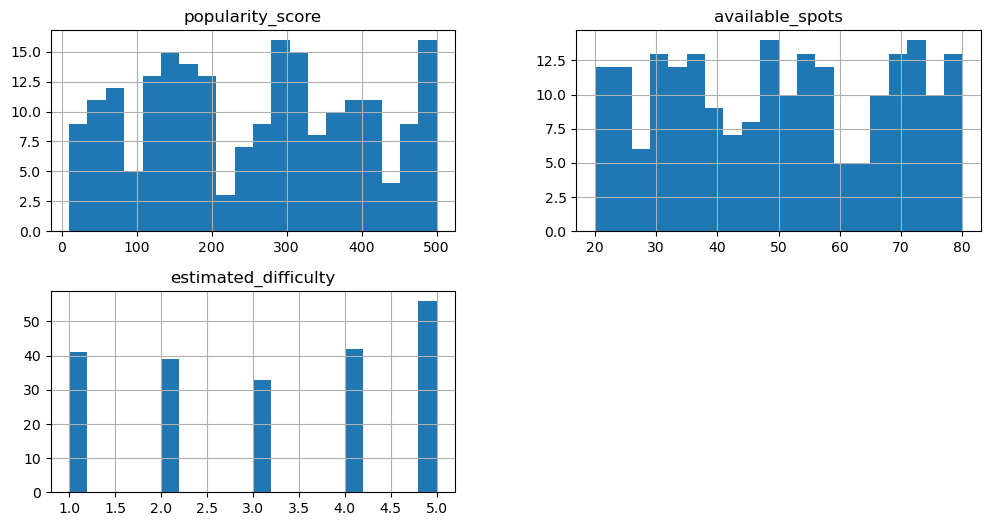

In [6]:
vkm[['popularity_score', 'available_spots', 'estimated_difficulty']].hist(bins=20, figsize=(12, 6))
plt.show()

We zien dat er in popularity_score vooral een hele score word gegeven (de pieken). 

En dat er in available spots, ook erg veel verdeeldheid is, er zijn veel modules met maar 20 plekken, maar er zijn er ongeveer evenveel met 80. 

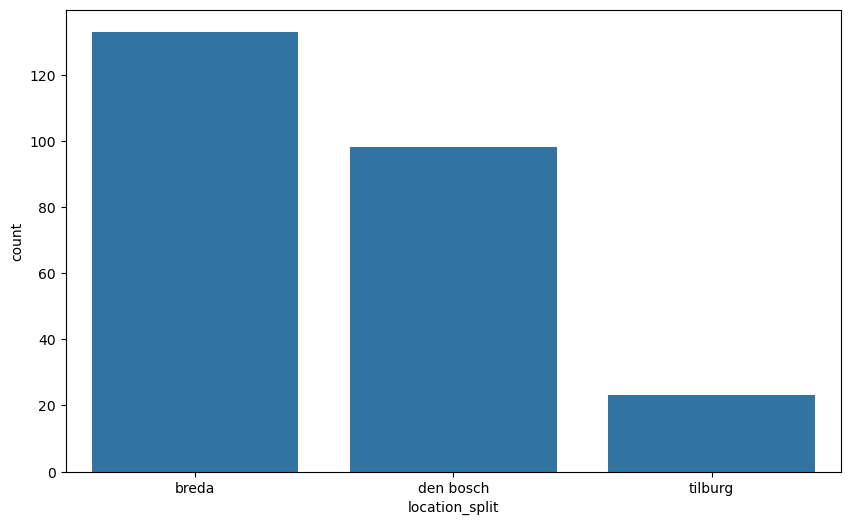

In [9]:
vkm['location_split'] = vkm['location'].str.split(' en ')
vkm_exploded = vkm.explode('location_split')
plt.figure(figsize=(10, 6))
sns.countplot(data=vkm_exploded, x='location_split', order=vkm_exploded['location_split'].value_counts().index)
plt.show()

Uit deze barplot word het heel erg duidelijk dat de meeste keuzemodules in Breda of Den Bosch te volgen zijn, met ook een klein gedeelte in Tilburg. 

Dit betekent dat studenten die Den Bosch of Breda wegfilteren, bijna of meer dan de helft van de keuzemodules misloopt. Dat willen we voorkomen, dus we moeten de studenten nudgen oom ook naar modules in Den Bosch te kijken, of reistijd mee te wegen in het advies van de ai.

Een voorbeeld van wat we kunnen doen, is ipv de mogelijkheid geven om locaties er uit te filteren, kan de gebruiker kiezen om bijv. op Breda te sorteren. Waardoor de gewenste resultaten bovenaan komen, maar de andere locaties ook er onder.

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_10160\2419035566.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(tags), palette='viridis')


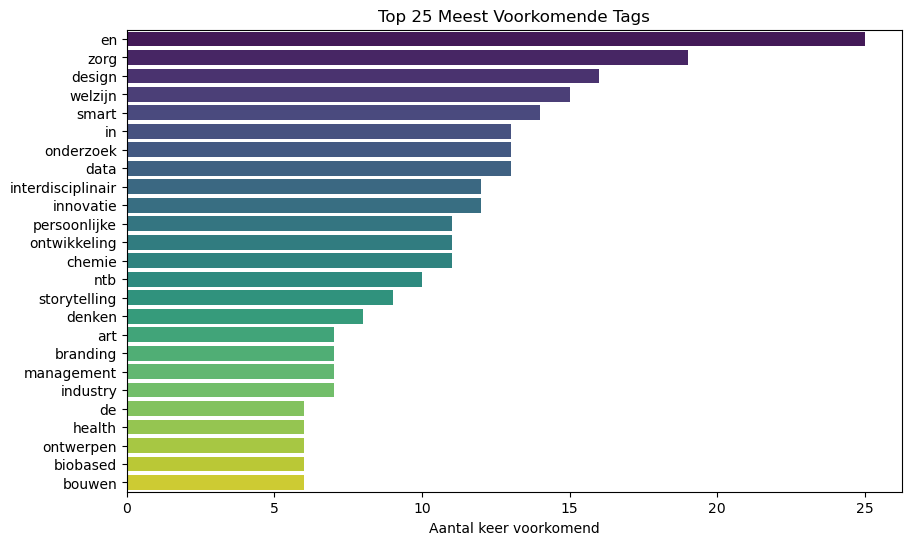

In [39]:
from collections import Counter


alle_tags = [tag for tags in vkm['module_tags_list'] for tag in tags]
top_10_tags = Counter(alle_tags).most_common(25)

tags, counts = zip(*top_10_tags)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(tags), palette='viridis')
plt.title('Top 25 Meest Voorkomende Tags')
plt.xlabel('Aantal keer voorkomend')
plt.show()

# Bivariate Analysis

Eerst willen we kijken of er een trend is dat studenten makkelijkere vakken leuker vinden en dus vaker kiezen.

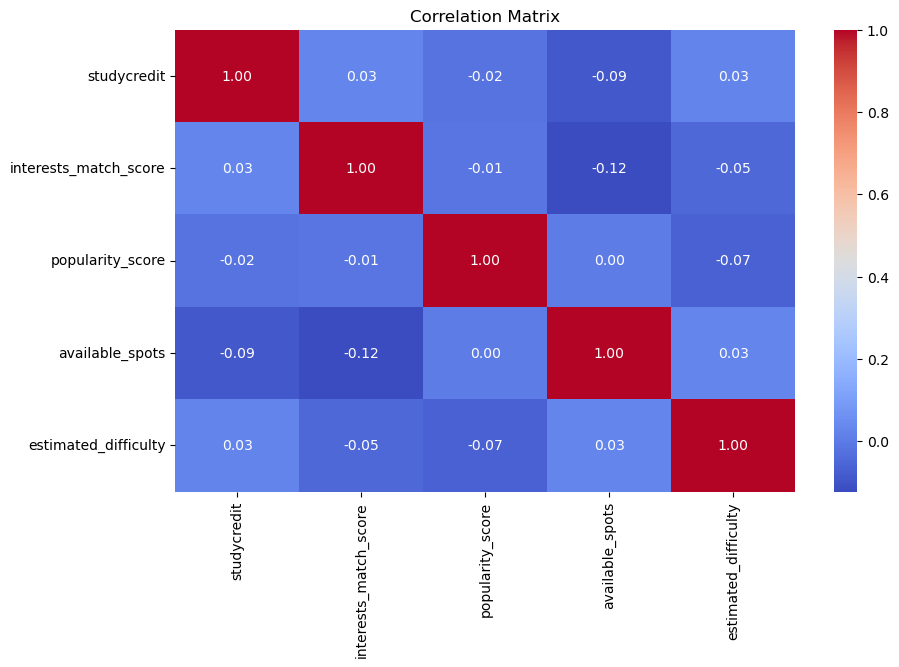

In [ ]:
plt.figure(figsize=(10, 6))
numeric_cols = ['studycredit', 'interests_match_score', 'popularity_score', 'available_spots', 'estimated_difficulty']
sns.heatmap(vkm[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Het is opvallend dat er geen correlatie te vinden is tussen bijvoorbeeld 'estimated difficulty', en 'popularity_score'. 

De aanname dat studenten kiezen voor makkelijke studiepunten is dus niet waar in dit geval.

Moeilijkheid hoeft dus niet zwaar te wegen als een negatieve factor in het aanbeveling systeem.

Text(0.5, 1.0, 'Popularity Score by Location')

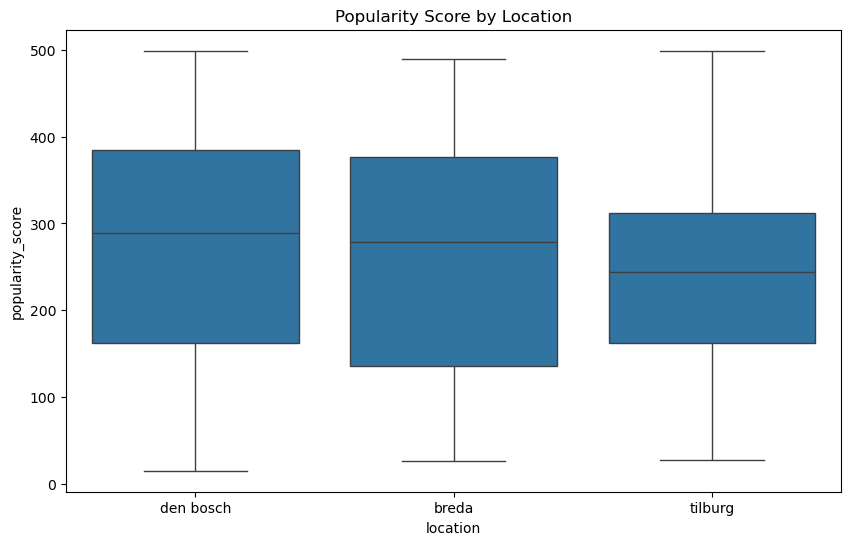

In [25]:
# popularity_score vs location excluding multiple locations
plt.figure(figsize=(10, 6))
sns.boxplot(data=vkm[vkm['location'].str.contains(' en ') == False], x='location', y='popularity_score')
plt.title('Popularity Score by Location')

Dit laat zien dat Den Bosch de hoogste populariteit heeft, en Tilburg het laagste.

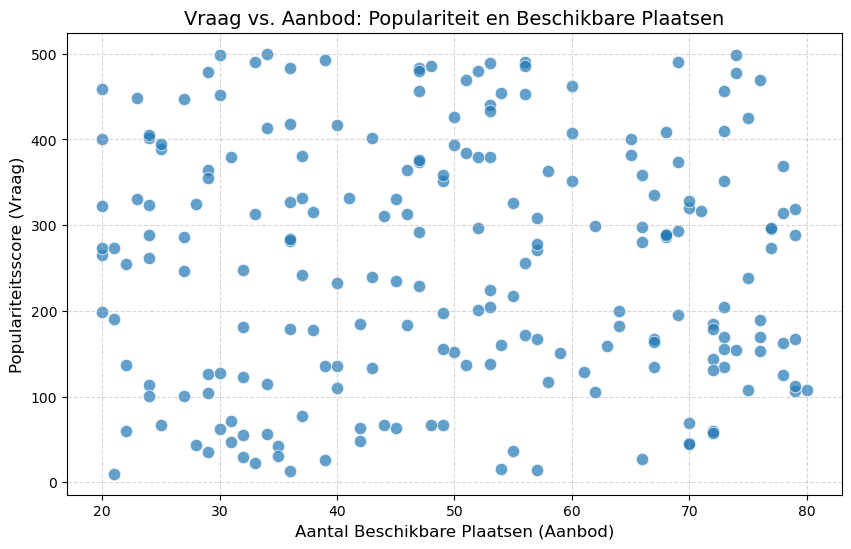

In [46]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=vkm, 
    x='available_spots', 
    y='popularity_score', 
    alpha=0.7,       # Iets doorzichtig voor als punten overlappen
    s=80,            # Vaste grootte voor alle punten
    edgecolor='white' # Wit randje om de punten voor contrast
)

plt.title('Vraag vs. Aanbod: Populariteit en Beschikbare Plaatsen', fontsize=14)
plt.xlabel('Aantal Beschikbare Plaatsen (Aanbod)', fontsize=12)
plt.ylabel('Populariteitsscore (Vraag)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

Er is geen correlatie tussen capaciteit en populariteit. Wat betekent dat het onderwijs niet goed is afgestemd op de wensen van de studenten. 

# Er zijn twee problemen. 

1. Aangezien alle vakken links boven erg populair zijn, maar ook weinig beschikbare plaatsen hebben, zijn er veel studenten die niet de module kunnen kiezen die ze willen. Resulterend in- Ontevredenheid over Keuzemodule systeem.

Ons algoritme moet dit kunnen detecteren en de studenten waarschuwen: Let Op! deze keuzemodule is erg gewild, en er is een kans dat je niet uitgekozen word. Ook moet ons product dan alternatieven die erop lijken aanbieden.

2. Rechts Onder zijn er modules die lage populariteits scores hebben, maar heel veel plek, wat er voor zorgt dat studenten moeten aansluiten bij modules die over het algemeen als slecht/minder leuk worden gezien. Resulterend in- Ontevredenheid over keuzemodule systeem. 

En wanneer er meer plekken zijn dan studenten, gaan er ook nog eens veel lege lokalen zijn bij de modules met een lage populariteit score.


C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_10160\2065942353.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_tags, x='avg_popularity', y='module_tags_list', palette='magma')


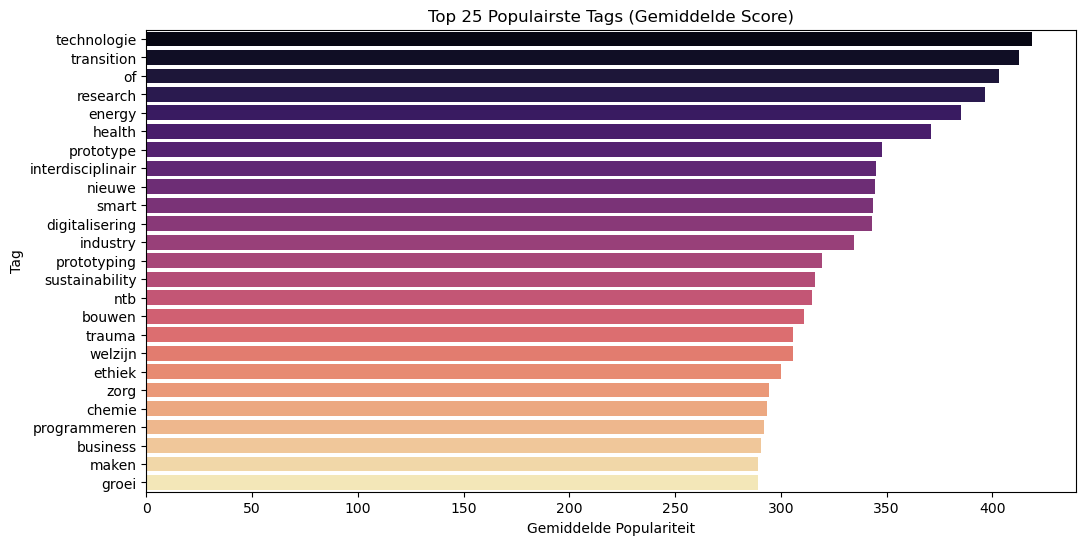

In [41]:
#Explodeer de dataset: elke tag krijgt zijn eigen rij
vkm_tags_exploded = vkm.explode('module_tags_list')

# 3. Bereken de gemiddelde populariteit per tag
# We tellen ook meteen hoe vaak een tag voorkomt ('count'), 
tag_popularity = vkm_tags_exploded.groupby('module_tags_list').agg(
    avg_popularity=('popularity_score', 'mean'),
    count=('popularity_score', 'count')
).reset_index()

# 4. Filteren: We kijken alleen naar tags die minstens 3 keer voorkomen
top_tags = tag_popularity[tag_popularity['count'] >= 3].sort_values(by='avg_popularity', ascending=False).head(25)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_tags, x='avg_popularity', y='module_tags_list', palette='magma')
plt.title('Top 25 Populairste Tags (Gemiddelde Score)')
plt.xlabel('Gemiddelde Populariteit')
plt.ylabel('Tag')
plt.show()

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_10160\1151271055.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_tags, x='avg_popularity', y='module_tags_list', palette='coolwarm_r')


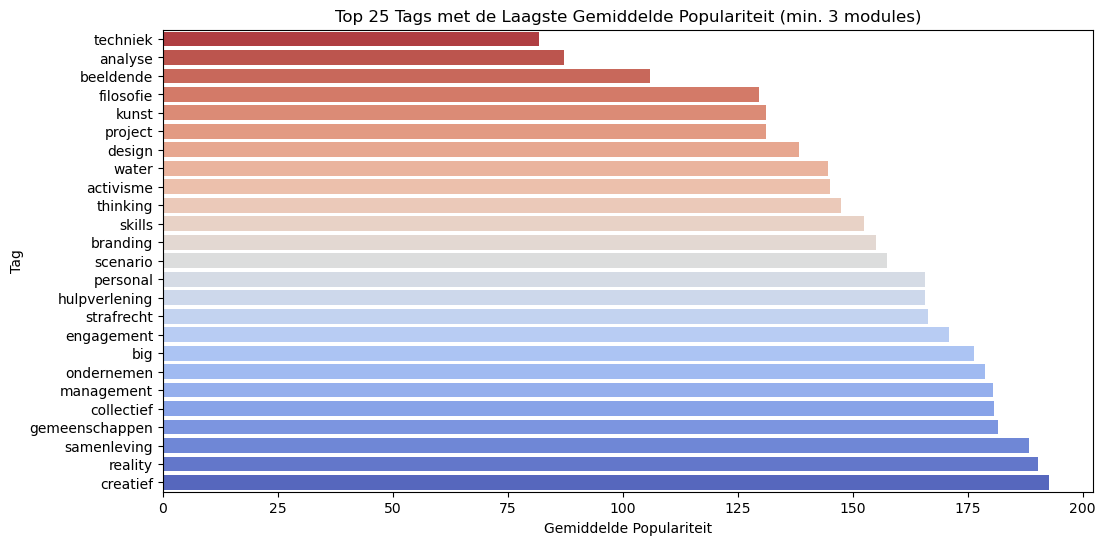

In [43]:
bottom_tags = tag_popularity[tag_popularity['count'] >= 3].sort_values(by='avg_popularity', ascending=True).head(25)

plt.figure(figsize=(12, 6))
sns.barplot(data=bottom_tags, x='avg_popularity', y='module_tags_list', palette='coolwarm_r')
plt.title('Top 25 Tags met de Laagste Gemiddelde Populariteit (min. 3 modules)')
plt.xlabel('Gemiddelde Populariteit')
plt.ylabel('Tag')
plt.show()

Hieruit blijkt dat studenten een voorkeur hebben voor Technologie, Research, Smart, Zorg, onderwerpen. Terwijl techniek, analyse, kunst en filosofie juist erg laag scoren.

Het is ook apart dat Technologie zo hoog scoort, maar Techniek zo laag. Misschien is het puur de woordkeuze? Studenten blijken ook hogere populariteits score te geven aan modernere termen. 
